In [1]:
import numpy as np
import pandas as pd

In [3]:
ad = pd.read_csv(r"C:\Users\ahmet\Downloads\Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# to delete unwanted columns, you can use read_csv function's 'usecols' parameter.
# ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4]) 
# This code does the same job as iloc did.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
df.isnull().values.any()

False

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


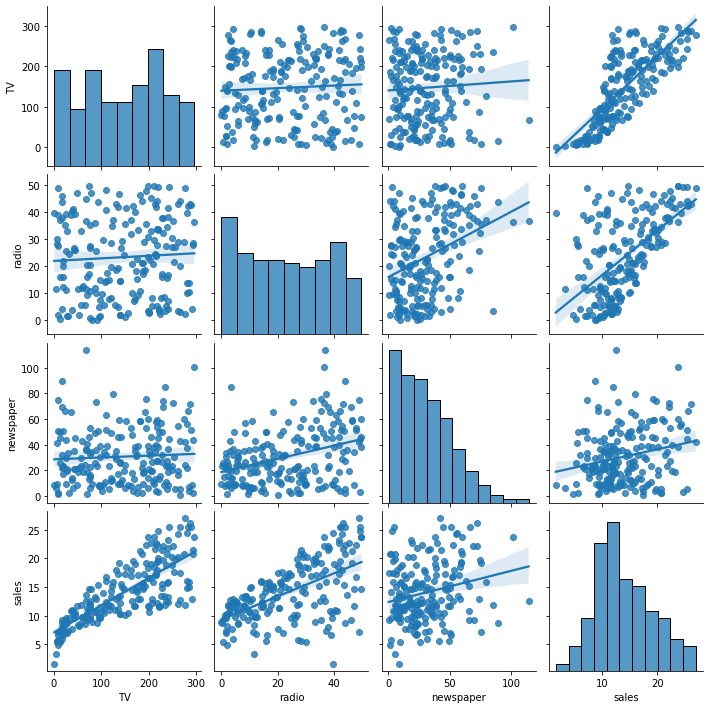

In [10]:
import seaborn as sns
sns.pairplot(df,kind='reg');

In [17]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


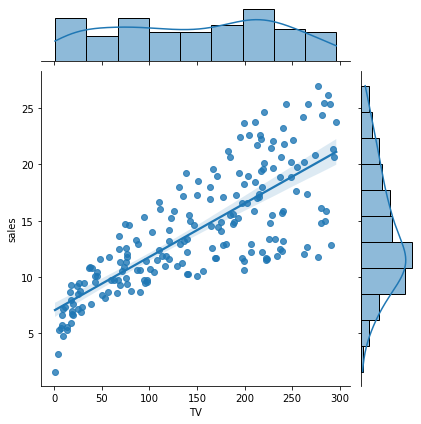

In [19]:
# Focus on TV-Sales
sns.jointplot(x = 'TV',
              y = 'sales',
              data = df,
              kind = 'reg');

### statsmodel ile modelleme

In [21]:
import statsmodels.api as sm

In [22]:
x = df[["TV"]]
x[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [23]:
# add constant array to df in order to calculate numpy array jobs
x = sm.add_constant(x)
x[0:5]

C:\Users\ahmet\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [24]:
y = df['sales']
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [26]:
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        13:39:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# R-squared:	0.612 bu değer bağımsız değişkenimiz TV'nin bağımlı değişkenimiz olan sales üzerindeki etkiyi açıklayabilme
# başarısıdır. Görüldüğü gibi TV sales üzerinde %60 açıklayabilme başarısına sahip

In [28]:
# F-statistic:	312.1 Bu ifade kurulan modelin anlamlılığına ilişkin bir değerdir

In [ ]:
# Prob (F-statistic):	1.47e-42 Bu ifade p-value değeridir

In [30]:
# Bu istatistik tablosunu çıkarmanın başka bir yolu:
import statsmodels.formula.api as smf
lm = smf.ols('sales~TV',df)
model =lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        13:55:51   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# eğer modelin parametrelerine ulaşmak istersek sadece:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [32]:
# Burada;
# Intercept = modelde oluşturulan regresyon doğrusunun y eksenini kestiği noktadır. Yani eğer Tv'ye hiç reklam verilmeseydi 
# satışlardaki durumun ne olacağı...

# TV ise; TV'ye verilecek reklamlardaki 1 birimlik artışın satışları ne oranda artıracağı...

In [35]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [36]:
model.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Thu, 17 Feb 2022",Prob (F-statistic):,1.47e-42
Time:,13:59:17,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [37]:
# modelimizin parametrelerinin güven aralıkları:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [39]:
# modelin anlamılığını veren değere kısa yoldan erişmek için:
model.f_pvalue

1.467389700194647e-42

In [43]:
# eğer bu çıktıdaki e ifadesi rahatsız ediyorsa:
print("f_pvalue:" , "%.3f"%model.f_pvalue)

f_pvalue: 0.000


In [44]:
print("tvalue:",'%.2f' % model.tvalues[0:1]) 

tvalue: 15.36


In [45]:
# Hata Kareler Toplamı 
model.mse_model

3314.618166868649

In [46]:
# sales bağımlı değişkeninin ortalaması 14 tü:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [47]:
# Ortalaması 14 olan bir değişken için hata kareler toplamının 3314 olması tam bir skandal. modelin kötü olduğunu gösterir

In [48]:
model.rsquared

0.611875050850071

In [50]:
# düzeltilmiş rquared için:
model.rsquared_adj

0.6099148238341623

In [51]:
# modelin tahmin ettiği ilk 5 değer :
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [52]:
#ilk 5 değerin gerçek değerini öğrenmek için:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [65]:
print("Sales = " + str('%.2f' % model.params[0]) + " + TV " + "* " + str('%.2f' % model.params[1]) )

Sales = 7.03 + TV * 0.05


(0.0, 28.27)

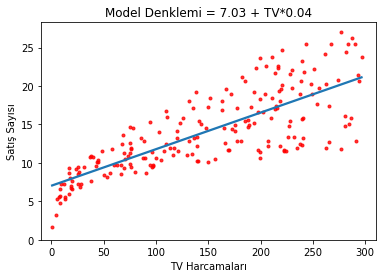

In [67]:
# Regresyon Modelinin Görsel Grafik Hali:
import matplotlib.pyplot as plt

g = sns.regplot(x = df['TV'], y = df['sales'], ci = None, scatter_kws = {'color': 'r', 's':9})
g.set_title("Model Denklemi = 7.03 + TV*0.04")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0)

In [68]:
# modeli bir desklearn ile kuralım:
from sklearn.linear_model import LinearRegression

In [70]:
X = df[["TV"]]
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)

In [72]:
model.intercept_

7.032593549127693

In [73]:
model.coef_

array([0.04753664])

In [74]:
print(type(model.intercept_))

<class 'numpy.float64'>


In [75]:
print(type(model.coef_))

<class 'numpy.ndarray'>


In [77]:
model.score(X,y) 
# bu skor modelin başarıdeğeri falan değil. bu skor rsquared değeridir

0.611875050850071

In [78]:
# modelin tahmin ettiği değerlere erişmek için predict fonksiyonu kullanılır
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [79]:
model.predict([[30]])

array([8.45869276])

In [81]:
yeni_veri = [[5],[90],[200]]
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

In [82]:
# şimdi de artıklar konusuna eğilelim biraz. Bunun için:
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
lm = smf.ols("sales~TV",df)
model = lm.fit()

In [84]:
mse = mean_squared_error(y,model.fittedvalues)

In [85]:
mse

10.512652915656757

In [86]:
# eğer mean square error'ın karekökünü almak istersek:
# rmse = rooted mean square error olsun
rmse = np.sqrt(mse)
rmse

3.2423221486546887

In [87]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [88]:
k_t = pd.DataFrame({"gercek_y": y[0:10],
                   "tahmin_y": reg.predict(X)[0:10]})

In [89]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [90]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [91]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [93]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [95]:
# bu hata karelerin toplamını almak için:
np.sum(k_t["hata_kare"])

92.90350329638103

In [97]:
# hata karelerin ortalaması
np.mean(k_t["hata_kare"])

9.290350329638105

In [98]:
# hata karelerin karekökü:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996776

In [99]:
# biz modeldeki hat hata_kare gibişeyleri elle hesapladık. şimdi de:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

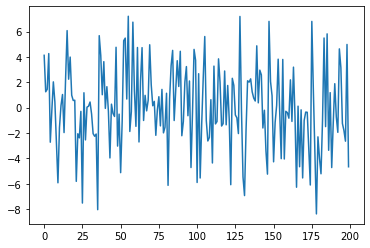

In [101]:
plt.plot(model.resid);

# ÇOKLU DOĞRUSAL REGRESYON

Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

In [108]:
# train/test split için bazı fonksiyonları import edeceğiz
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [106]:
df = ad.copy()
X = df.drop(['Unnamed: 0','sales'], axis = 1)
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [107]:
y = df['sales']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [110]:
X_train.shape

(160, 3)

In [111]:
y_train.shape

(160,)

In [112]:
X_test.shape

(40, 3)

In [113]:
y_test.shape

(40,)

In [115]:
training = df.copy()
training.shape # verisetinin ilk hali

(200, 5)

**Statsmodels ile _Çoklu Doğrusal Regresyon_ Kurma**

In [116]:
lm = sm.OLS(y_train, X_train)

In [117]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):                   1.28e-137
Time:                        16:47:36   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [118]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


**Sklearn ile _Çoklu Doğrusal Regresyon_ Modeli Kurma**

In [119]:
lm = LinearRegression()
model = lm.fit(X_train,y_train) 

In [120]:
model.intercept_

2.979067338122629

In [121]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

**Kurulan Model ile Tahmin**

Soru: 30 birim TV harcaması, 10 birim radio harcaması, 40 birimde gazete harcaması olduğunda satışlların tahminideğeri ne olur?

In [122]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [123]:
yeni_veri

,0,1,2
0,30,10,40


In [124]:
model.predict(yeni_veri)

array([6.32334798])

In [128]:
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train))) # bu bizim eğitim hatamız
rmse

1.644727765644337

In [130]:
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test))) # bu da test hatamız
rmse

1.7815996615334504

**Model Tuning/Model Doğrulama**

In [131]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [132]:
X = df.drop('sales', axis = 1)
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,
                                                   random_state = 42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [133]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.6442982086509954

In [135]:
model.score(X_train, y_train)

0.8957553000540606

In [136]:
# random_state değerini her değiştirdiğimizde farklı bir model.score değeri alırız. Bunun için cross_val_score ile birbirinden
# farklı durumlarda model.score'un ortalmasını bulmamız lazım.
cross_val_score(model,
                X,
                y,
                cv = 10,
                scoring = 'r2').mean()

0.8824997330280174

In [137]:
cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = 'r2').mean()

0.789949698909751

In [138]:
cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = 'neg_mean_squared_error')

array([-5.5641438 , -2.85694821, -2.05863931, -1.08456445, -1.68091618,
       -2.49925274, -3.15851478, -2.01785697, -7.24533506, -1.72169161])

In [139]:
# başlarındaki eksiyi kaldırmak için:
-cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = 'neg_mean_squared_error')

array([5.5641438 , 2.85694821, 2.05863931, 1.08456445, 1.68091618,
       2.49925274, 3.15851478, 2.01785697, 7.24533506, 1.72169161])

In [140]:
# şimdi de rmse değerlerine bakalım:
np.sqrt(-cross_val_score(model,
                X_train,
                y_train, 
                cv = 10,
                scoring = 'neg_mean_squared_error'))

array([2.35884374, 1.69025093, 1.43479591, 1.04142424, 1.29650152,
       1.58090251, 1.77722108, 1.42051292, 2.69171601, 1.31213247])

In [141]:
np.sqrt(-cross_val_score(model,
                X_train,
                y_train,
                cv = 10,
                scoring = 'neg_mean_squared_error')).mean()

1.660430133054908

In [142]:
# işte bu benim gerçek eğitim hatam

# PCR(PRINCIPAL COMPONENT REGRESSION) - TEMEL BİLEŞEN REGRESYONU

Değişkenlere boyut indirgeme uygulandıktan sonra çıkan bileşenlere regresyon modeli kurulması fikrine dayanır.

In [143]:
# Bazen çok fazla değişken hedef bağımlı değişkeni etkiler. İşte bu çok fazla olan değişkenlerden bazıları
# bilgi kaybı da göze alınarak elenir ve boyut küçültülmüş olur.>

### Model

In [147]:
hitters = pd.read_csv(r"C:\Users\ahmet\Downloads\Hitters.csv")
df = hitters.copy()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [149]:
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [152]:
# bu veri seti nba  basketçilerinden bazılarının atış istatisklerini veriyor

In [153]:
# Öncelikle verisetinde bulunan kategorik değişkenleri dummy yapalım

In [154]:
dms = pd.get_dummies(df[['League','Division','NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [155]:
# fakat burada şu an dummy değişken tuzağı var. Yani her kategorik değişken için aynı bilgiyi taşıyan iki column var. 
# Eğer League_A 0 ise League_N 1 olacaktır zaten.

In [156]:
y = df['Salary']

In [158]:
# şimdi orijinal verisetimizde bulunan dummy yaptığımız değişkenleri ve hedefimiz olan bağımlı değişken salary'i çıkartalım ve 
# bu 4 column'ın çıkarılmış halini yeni bir verisetine atayalım
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype('float64')
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [160]:
# şimdi ise dummy yaptığımız kategorik değişkeni X_ dataframe'i ile concat edelim
X = pd.concat([X_, dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X.head()
               

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (197, 19)
X_test (66, 19)
y_train (197,)
y_test (66,)


In [163]:
training = df.copy()
print("training",training.shape)

training (263, 20)


In [165]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()

In [166]:
X_reduced_train = pca.fit_transform(scale(X_train ))

In [167]:
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [168]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

168. hücrenin açıklmaası:
burada amaç her bir değişkenin, bağımlı değişken üzerindeki etkisini ölçebilmektir.
https://www.geeksforgeeks.org/numpy-cumsum-in-python/ burada cumsum anlatılıyor. 
Burada anlatılandan yola çıkarak hangi değişkenin değişkenliği yüzde kaç etkilediği görülüyor

np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10] değişken sayısını belirleyip modelimizi kuruyoruz

In [169]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [170]:
pcr_model.intercept_

543.4834416243655

In [172]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

**PCR Model Tahmin**

In [173]:
y_predicted = pcr_model.predict(X_reduced_train)

In [174]:
y_predicted[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [175]:
# mean square error'un karekökünü bulalım
np.sqrt(mean_squared_error(y_train, y_predicted))

289.32928255649756

In [177]:
df['Salary'].mean()

535.9258821292775

In [178]:
r2_score(y_train, y_predicted)

0.577007525041018

In [179]:
# şimdi bu yapılanları bir de test setine uygulayalım

In [180]:
pca2 = PCA()

In [181]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [182]:
# şimdi de hatayı hesaplamak için X_reduced_test üzerinden predict edilen y değerlerini bulalım
y_predicted = pcr_model.predict(X_reduced_test)

In [185]:
# test seti için de hata hesaplama işlemini gerçekleştirelim
np.sqrt(mean_squared_error(y_test,y_predicted))

405.1575364149963

**PCR Model Tuning**

In [186]:
# PCR modelin esprisi neydi? Değişken sayısıyla oynayabiliyorduk.
#Ama buraya kadar biz 19 değişkenin hepsini hesaba katarak bir model oluşturduk.

In [187]:
lm= LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)
y_predicted = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

405.1575364149963


In [188]:
# Tek bileşenli(değişkenli) PCR model kurmak istersek:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1],y_train)
y_predicted = pcr_model.predict(X_reduced_test[:,0:1])
print(np.sqrt(mean_squared_error(y_test,y_predicted)))

392.38935589493457


In [189]:
# aşağıdaki satırlarda sırasıyla bileşen sayısını artıracağız ve ortaya çıkan mean_squared_error karekökü değerini göreceğiz

In [190]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:2],y_train)
y_predicted = pcr_model.predict(X_reduced_test[:,0:2])
print(np.sqrt(mean_squared_error(y_test,y_predicted)))

396.38761247967653


In [191]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:5],y_train)
y_predicted = pcr_model.predict(X_reduced_test[:,0:5])
print(np.sqrt(mean_squared_error(y_test,y_predicted)))

397.2336440791341


In [192]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:7],y_train)
y_predicted = pcr_model.predict(X_reduced_test[:,0:7])
print(np.sqrt(mean_squared_error(y_test,y_predicted)))

391.93749927654534


In [194]:
# işte tam da önemli yerdeyiz. 
# peki biz kaç tane bileşeni hesaba kattığımızda en düşük mean_squared_error karekökü değerini elde ederiz?
# cross validation işlemi burada devreye giriyor...
# bunu başarmak için şu modülü import edelim:
from sklearn import model_selection

In [196]:
# şimdi 10 katlı bir cross validation uygulaması yapalım:
cv_10 = model_selection.KFold(n_splits = 10, 
                              shuffle = True,
                              random_state = 1)
# her bir bileşen sayısı için modeller oluşturulacak ve train hataları hesaplanacak

In [197]:
lm = LinearRegression()
RMSE = []
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,
                                                       X_reduced_train[:,:i],
                                                       y_train.ravel(),
                                                       cv = cv_10,
                                                       scoring = 'neg_mean_squared_error'))
    RMSE.append(score)

In [198]:
RMSE

[array([295.43979279, 265.12929435, 356.29781386, 344.87932361,
        351.12806496, 434.162779  , 266.69856294, 401.98756516,
        376.85957436, 243.39744545]),
 array([329.85371979, 251.02510651, 358.26524872, 334.84297404,
        355.11953463, 422.35572386, 281.5109649 , 393.9802562 ,
        349.79269189, 227.62050956]),
 array([335.13326563, 250.03935282, 361.34117536, 324.3383217 ,
        354.60158063, 418.87512395, 278.74627049, 404.30159496,
        340.14170625, 235.23449154]),
 array([352.40514251, 271.00091559, 355.3645993 , 308.29668341,
        350.37696671, 403.98280292, 264.97296685, 402.14873905,
        375.90231094, 222.20261074]),
 array([346.5825774 , 269.06151378, 343.36017634, 308.26145218,
        337.98136356, 396.07274518, 277.18744642, 403.01495607,
        364.00815498, 218.99569882]),
 array([330.36373902, 276.17780372, 328.15164815, 290.21065718,
        340.12518197, 387.77266095, 282.92206132, 406.0139846 ,
        387.91972841, 209.49248247]),
 arr

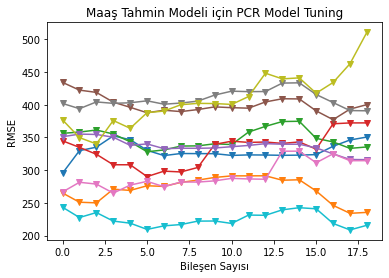

In [199]:
# şimdi bu RMSE yi bi çizelim
plt.plot(RMSE,'-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli için PCR Model Tuning');

In [200]:
# optimum bileşen sayısı 6 gibi....

In [201]:
lm = LinearRegression()

In [202]:
pcr_model = lm.fit(X_reduced_train[:,0:6],y_train)
y_predicted = pcr_model.predict(X_reduced_train[:,0:6])
print(np.sqrt(mean_squared_error(y_train,y_predicted)))

308.8265983094501


In [203]:
# şimdi 201. hücrede yaptığımız işlemi test seti için de gerçekleştirelim
y_predicted = pcr_model.predict(X_reduced_test[:,0:6])
print(np.sqrt(mean_squared_error(y_test,y_predicted)))

393.11987000962233


# PLS - (KISMİ EN KÜÇÜK KARELER REGRESYONU)

Değişkenlerin daha az sayıda ve aralarında çoklu doğrusal bağlantı problemi olmayan bileşenlere indirgenip regresyon modeli kurulması fikrine dayanır.

PLS NIPALS'in özel bir halidir, iteratif olarak bağımlı değişken ile yüksek korelasyona sahip değişkenler arasındaki gizli ilişkiyi bulmaya çalışır.

PCR'de boyut küçültmesi yaparken bunu doğrusal bir şekilde yapıyorduk. Fakat PLS'de boyut indirgeme yapılırken bağımlı değişken ile kovaryansı maksimum olan değişkenler tutulur. Bu yüzden PLS modeli açıklanabilirlik açısından daha optimizedir.

PLS'de de PCR'de olduğu gibi optimum bileşen sayısını belirlemek için CV yöntemi kullanılır.

In [205]:
df = hitters.copy()

In [206]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [210]:
df = df.dropna()
ms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [211]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [212]:
pls_model = PLSRegression().fit(X_train, y_train)

In [213]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [216]:
pls_model = PLSRegression(n_components = 6).fit(X_train, y_train)

In [217]:
pls_model.coef_

array([[-108.74143193],
       [ 197.6386967 ],
       [  22.57338481],
       [  26.52768741],
       [ -25.67952167],
       [  54.16363009],
       [ -25.89997437],
       [   5.36637756],
       [  89.44665343],
       [  26.79039104],
       [ 102.43239418],
       [  68.82932424],
       [ -61.11470635],
       [  94.44121847],
       [  26.38215013],
       [ -45.01850138],
       [  77.17773908],
       [ -35.85447586],
       [ -45.66863853]])

In [218]:
# Görüldüğü gibi bileşen sayısını 6'ya düşürmemize rağmen hala tüm bileşenlerin(bağımsız değişkenlerin) katsayılarını elde edebiliyoruz

**PLS Model Tahmin**

In [227]:
y_predicted = pls_model.predict(X_train)

In [228]:
np.sqrt(mean_squared_error(y_train, y_predicted)) # Train hatası

298.0184320581615

In [229]:
r2_score(y_train,y_predicted)

0.5512193616082298

In [230]:
# Her zaman olduğu gibi; test setimizin de hatasını görmek isteriz

In [231]:
y_predicted = pls_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predicted))

370.2053552168744

**PLS Model Tuning**

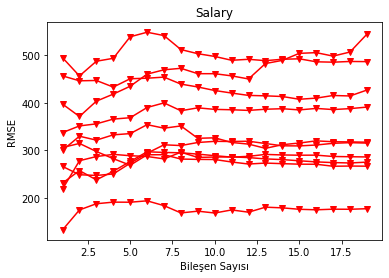

In [239]:
cv_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 42)

# Hata hesaplamak için döngü(fakrlı bileşen kombinasyonlarında alınan hataları daha sonrası için değerlendirmek adına kurulan bir döngü)
RMSE = []
for i in np.arange(1,X_train.shape[1] + 1):
    
    pls = PLSRegression(n_components = i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv = cv_10, scoring = 'neg_mean_squared_error'))
    RMSE.append(score)
# Visualization
plt.plot(np.arange(1,X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary')
plt.show()

In [240]:
# Görüldüğü gibi bileşen sayısı 2 olduğunda optimum bir model elde ediyoruz. Çünkü hata kareler ortalamasının(MSE) karekökü(RMSE)
# bileşen sayısı 2 olduğunda en az oluyor....!

In [242]:
# şimdi 2 bileşene göre modelli tekrar fit et
pls_model = PLSRegression(n_components = 2).fit(X_train, y_train)
y_predicted = pls_model.predict(X_test)

In [243]:
np.sqrt(mean_squared_error(y_test, y_predicted))

398.09956327448526

# RIDGE REGRESYON

Hata kareler toplamını minimize eden katsayıları bu katsayılara ceza uygulayarak bulmaktır

Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaaz(PLS ve PCR'de çıkartıyodu) bunun yerine katsayılarını modeli az etkileyecek şekilde 0'a yaklaştırır.

PLS ve PCR' de olduğu gibi çok fazla değişken olduğunda(çok boyutluluk laneti) etkili çözüm sunar.

Çok fazla parametre olduğunda PLS' ye göre daha iyidir.

Yanlıdır fakat varyansı düşüktür.( variance = root square of standard deviation)

Formüldeki lambda değerinin bulunması için cross validation yöntemi kullanılır

**Model**

In [247]:
df = hitters.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [248]:
from sklearn.linear_model import Ridge

In [249]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train) 

In [251]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [252]:
# katsayılara uyguladığımız cezanın şiddetini lambda(diğer adıyla alpha) değeri ile ayarlayabilirz.

Text(0.5, 1.0, 'Ridge Katsayıları')

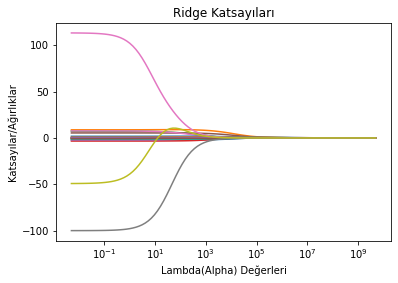

In [253]:
lambda_values = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambda_values:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

ax = plt.gca()
ax.plot(lambda_values,katsayilar)
ax.set_xscale('log')

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Ridge Katsayıları')

In [259]:
lambda_values = 10**np.linspace(10,-2,100)*0.5
lambda_values[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

**Tahmin**

In [256]:
y_predicted = ridge_model.predict(X_test)

In [258]:
# test hatası
np.sqrt(mean_squared_error(y_test,y_predicted))
# bu ridge_model deki alpha değerimiz 0.1(see 249.cell)

357.0517922282842

**Ridge Regression Model Tuning**

In [ ]:
lambda_values = 10**np.linspace(10,-2,100)*0.5

In [261]:
from sklearn.linear_model import RidgeCV
# cross validation ile modeli tune edeceğiz

In [262]:
ridge_cv = RidgeCV(alphas = lambda_values, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [263]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [264]:
ridge_cv.coef_

array([ 1.44624890e-01,  1.04791010e+00,  1.36872965e+00,  1.20061792e+00,
        7.82870997e-01,  1.55552882e+00,  3.76433192e+00,  1.20382822e-02,
        5.32415433e-02,  2.55307367e-01,  1.08012329e-01,  9.63035626e-02,
        8.68878351e-02,  1.62796122e-01,  3.20045418e-02, -1.01265296e+00,
        2.89891038e+01, -6.76670272e+01,  1.27302535e+01])

In [265]:
ridge_cv.alpha_

0.7599555414764666

In [267]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, normalize = True).fit(X_train, y_train)

In [268]:
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.6826429756415

# LASSO REGRESYON

Amaç hata kareler toplammını minimize eden katsayıları bu katsayılara ceza uygulayarak bulmaktır.

Ridge regresyondan farkı lasso'da ceza uygulanırken katsayıları 0 yapmaktır

Lambda çok büyükse bazı katsayılar 0'a yaklaşır ve değişken seçimi yapılmış olur. Zaten amaç da budur: Ridge regresyonda ilgili ilgisiz tüm değişkenler hesaba katılıyordu lassoda ise bazıları elenmiş olur. Fakat yine de ridge ve lasso'nun birbirlerine üstünlüğü yoktur.

In [269]:
df = hitters.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [270]:
from sklearn.linear_model import Lasso

In [271]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388062, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [274]:
lasso_model

Lasso(alpha=0.1)

In [275]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.55874145031, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679518908, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137467921, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning

Text(0, 0.5, 'weights')

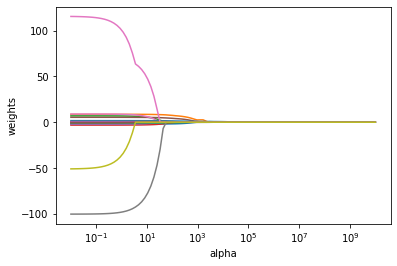

In [276]:
lasso = Lasso()
lambda_values = 10**np.linspace(10,-2,100)*0.5
katsayilar = []

for i in lambda_values:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)

ax = plt.gca()
ax.plot(lambda_values*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

**Tahmin**

In [277]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [278]:
y_predicted = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_predicted))

356.754527014877

**Lasso Model Tuning**

In [279]:
from sklearn.linear_model import LassoCV

In [281]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10,
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [282]:
lasso_cv_model.alpha_

0.3940612643247005

In [283]:
# görüldüğü gibi bu sefer alph değerlerini biz vermedik bunun yerine fonksiyonun kendisine bıraktık alpha değerini bulması için

In [284]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [285]:
lasso_tuned.fit(X_train, y_train)

C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523987, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.3940612643247005)

In [286]:
y_predicted = lasso_tuned.predict(X_test)

In [287]:
np.sqrt(mean_squared_error(y_test, y_predicted))

356.5226376958369

# ELASTIC NET REGRESSION

Amaç hata kareler toplamını minimize eden katsayıları bu katsayılara ceza uygulayarak bulmaktır.ElasticNet Lasso ve Ridge yaklaşımlarını sentezler.

In [288]:
df = hitters.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_,dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [289]:
from sklearn.linear_model import ElasticNet

In [290]:
enet_model = ElasticNet().fit(X_train, y_train)

C:\Users\ahmet\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936731, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [291]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [292]:
enet_model.intercept_

-6.465955602111762

In [293]:
y_predicted = enet_model.predict(X_test)

In [295]:
np.sqrt(mean_squared_error(y_test, y_predicted))

357.16765481812445

**ElasticNet Model Tuning**

In [301]:
from sklearn.linear_model import ElasticNetCV

In [303]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [304]:
enet_cv_model.alpha_

5230.7647364798695

In [305]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [306]:
y_predicted = enet_tuned.predict(X_test)

In [307]:
np.sqrt(mean_squared_error(y_test,y_predicted))

394.15280563218795